In [326]:
import db_funcs
import config
import json
import mysql
with open('full_actor_list.json','r') as read_file:
    actorData= json.load(read_file)
import numpy as np

In [327]:
actorData
cnx = mysql.connector .connect(
    host = config.host,
    user = 'mackenzie',
    passwd = config.password,
    database = 'movie_project'
)

In [328]:
import config
import importlib
importlib.reload(config)
c=cnx.cursor()
c

In [329]:
conn = db_funcs.get_db_conn(config)

In [330]:
conn
c=conn.cursor()
c

In [188]:
c

In [189]:
def dynamic_entry_actors(actorList):
    cursor=conn.cursor()
    for actor in actorList:
        actor_id=actor['actor_id']
        first_name=actor['first']
        last_name=actor['last']
        pop_rank=actor['pop_rank']
        social_rank=actor['social']
        salary=actor['salary']
        db_funcs.insert_actor_values(cursor, actor_id, first_name, last_name, pop_rank, social_rank, salary)
        

In [103]:
dynamic_entry_actors(actorData)

In [46]:
conn.commit()

In [124]:
conn.close()

In [66]:
insert_str = """INSERT INTO moviesxactors (title_id, actor_id) VALUES (%s, %s) """

In [67]:
#values = ()

In [68]:
#execute(insert_str, values)

In [53]:
#junction movies and actors
cursor.execute()

In [69]:
# insert_actor_values(cursor, actor_id, first_name, last_name, pop_rank,
#                         social_rank, salary)

In [70]:
def insert_actors_movies(cursor, title_id, actor_id):
    insert_str = """INSERT INTO moviesxactors (title_id, actor_id) VALUES (%s, %s) """
    values = (title_id, actor_id)
    cursor.execute(insert_str, values)

In [331]:
import json

In [332]:
with open('cleaned_movie_data_for_50_actors.json','r') as read_file:
    movieData= json.load(read_file)

In [333]:
len(movieData)

2638

In [334]:
movieData[0]

{'movie_id': 'tt5697510',
 'title': 'Jekyll',
 'director': 'Ruben Fleischer',
 'cast': ['Chris Evans',
  'Prime VideoUnlimited Streamingof Movies & TV',
  'Amazon FranceBuy Movies onDVD & Blu-ray',
  None,
  None,
  None],
 'genres': None,
 'metascore': 0,
 'budget': 0,
 'box office gross usa': 0,
 'box office cumulative': 0,
 'box office opening week': 0,
 'studio': ' A Very Good Production Inc.'}

In [335]:
for movie in movieData:
    for member in movie['cast']:
        if member != None:
            if len(member)>30:
                member=None
movieData

[{'movie_id': 'tt5697510',
  'title': 'Jekyll',
  'director': 'Ruben Fleischer',
  'cast': ['Chris Evans',
   'Prime VideoUnlimited Streamingof Movies & TV',
   'Amazon FranceBuy Movies onDVD & Blu-ray',
   None,
   None,
   None],
  'genres': None,
  'metascore': 0,
  'budget': 0,
  'box office gross usa': 0,
  'box office cumulative': 0,
  'box office opening week': 0,
  'studio': ' A Very Good Production Inc.'},
 {'movie_id': 'tt8946378',
  'title': 'Knives Out (2019)',
  'director': 'Rian Johnson',
  'cast': ['Chris Evans',
   'Ana de Armas',
   'Daniel Craig',
   'Jamie Lee Curtis',
   'Michael Shannon',
   'Toni Collette'],
  'genres': ['Comedy', 'Crime', 'Drama', 'Mystery', 'Thriller'],
  'metascore': 0,
  'budget': 0,
  'box office gross usa': 0,
  'box office cumulative': 0,
  'box office opening week': 0,
  'studio': ' FilmNation Entertainment'},
 {'movie_id': 'tt4995776',
  'title': 'Operation Brothers (2019)',
  'director': 'Gideon Raff',
  'cast': ['Chris Evans',
   'Haley

In [467]:
c.execute("""select actor_id, first_name, last_name, pop_rank, avg(movies.bo_ww)
from actors
join moviesxactors
using (actor_id)
join movies
using (title_id)
group by actor_id
order by pop_rank""")

In [468]:
results0 = c.fetchall()

In [469]:
actor_names=[]
results0
for result in results0:
    name=result[1]+' '+result[2]
    actor_names.append(name)
actor_names

social_rank=[]


label=[]
for result in results0:
    rank=result[3]
    name=result[1]+' '+result[2]
    label.append({rank:name})
    


In [470]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] [843, 563, 230, 127, 97, 156, 96, 102, 67, 690, 117, 181, 222, 284, 106, 80, 80, 940, 180, 898, 111, 153, 35, 161, 657, 363, 217, 933, 56, 375, 487, 108, 209, 85, 76, 56, 803, 94, 109, 638, 52, 129, 138, 150, 96, 53, 156, 48, 93]
[{1: 'Chris Evans'}, {2: 'Robert Downey'}, {3: 'Jennifer Lawrence'}, {4: 'Channing Tatum'}, {5: 'George Clooney'}, {7: 'Margot Robbie'}, {8: 'Jared Leto'}, {9: 'Ryan Reynolds'}, {10: 'Ryan Gosling'}, {11: 'Scarlett Johansson'}, {12: 'Brad Pitt'}, {13: 'Matt Damon'}, {14: 'Will Smith'}, {15: 'Paul Rudd'}, {16: 'Ben Affleck'}, {17: 'Matthew McConaughey'}, {18: 'Tom Hardy'}, {19: 'Chris Hemsworth'}, {20: 'Dwayne Johnson'}, {21: 'Tom Hiddleston'}, {22: 'Jamie Foxx'}, {23: 'Emma Stone'}, {24: 'Nicolas Cage'}, {25: 'Tom Cruise'}, {26: 'Chris Pratt'}, {27: 'Samuel Jackson'}, {28: '

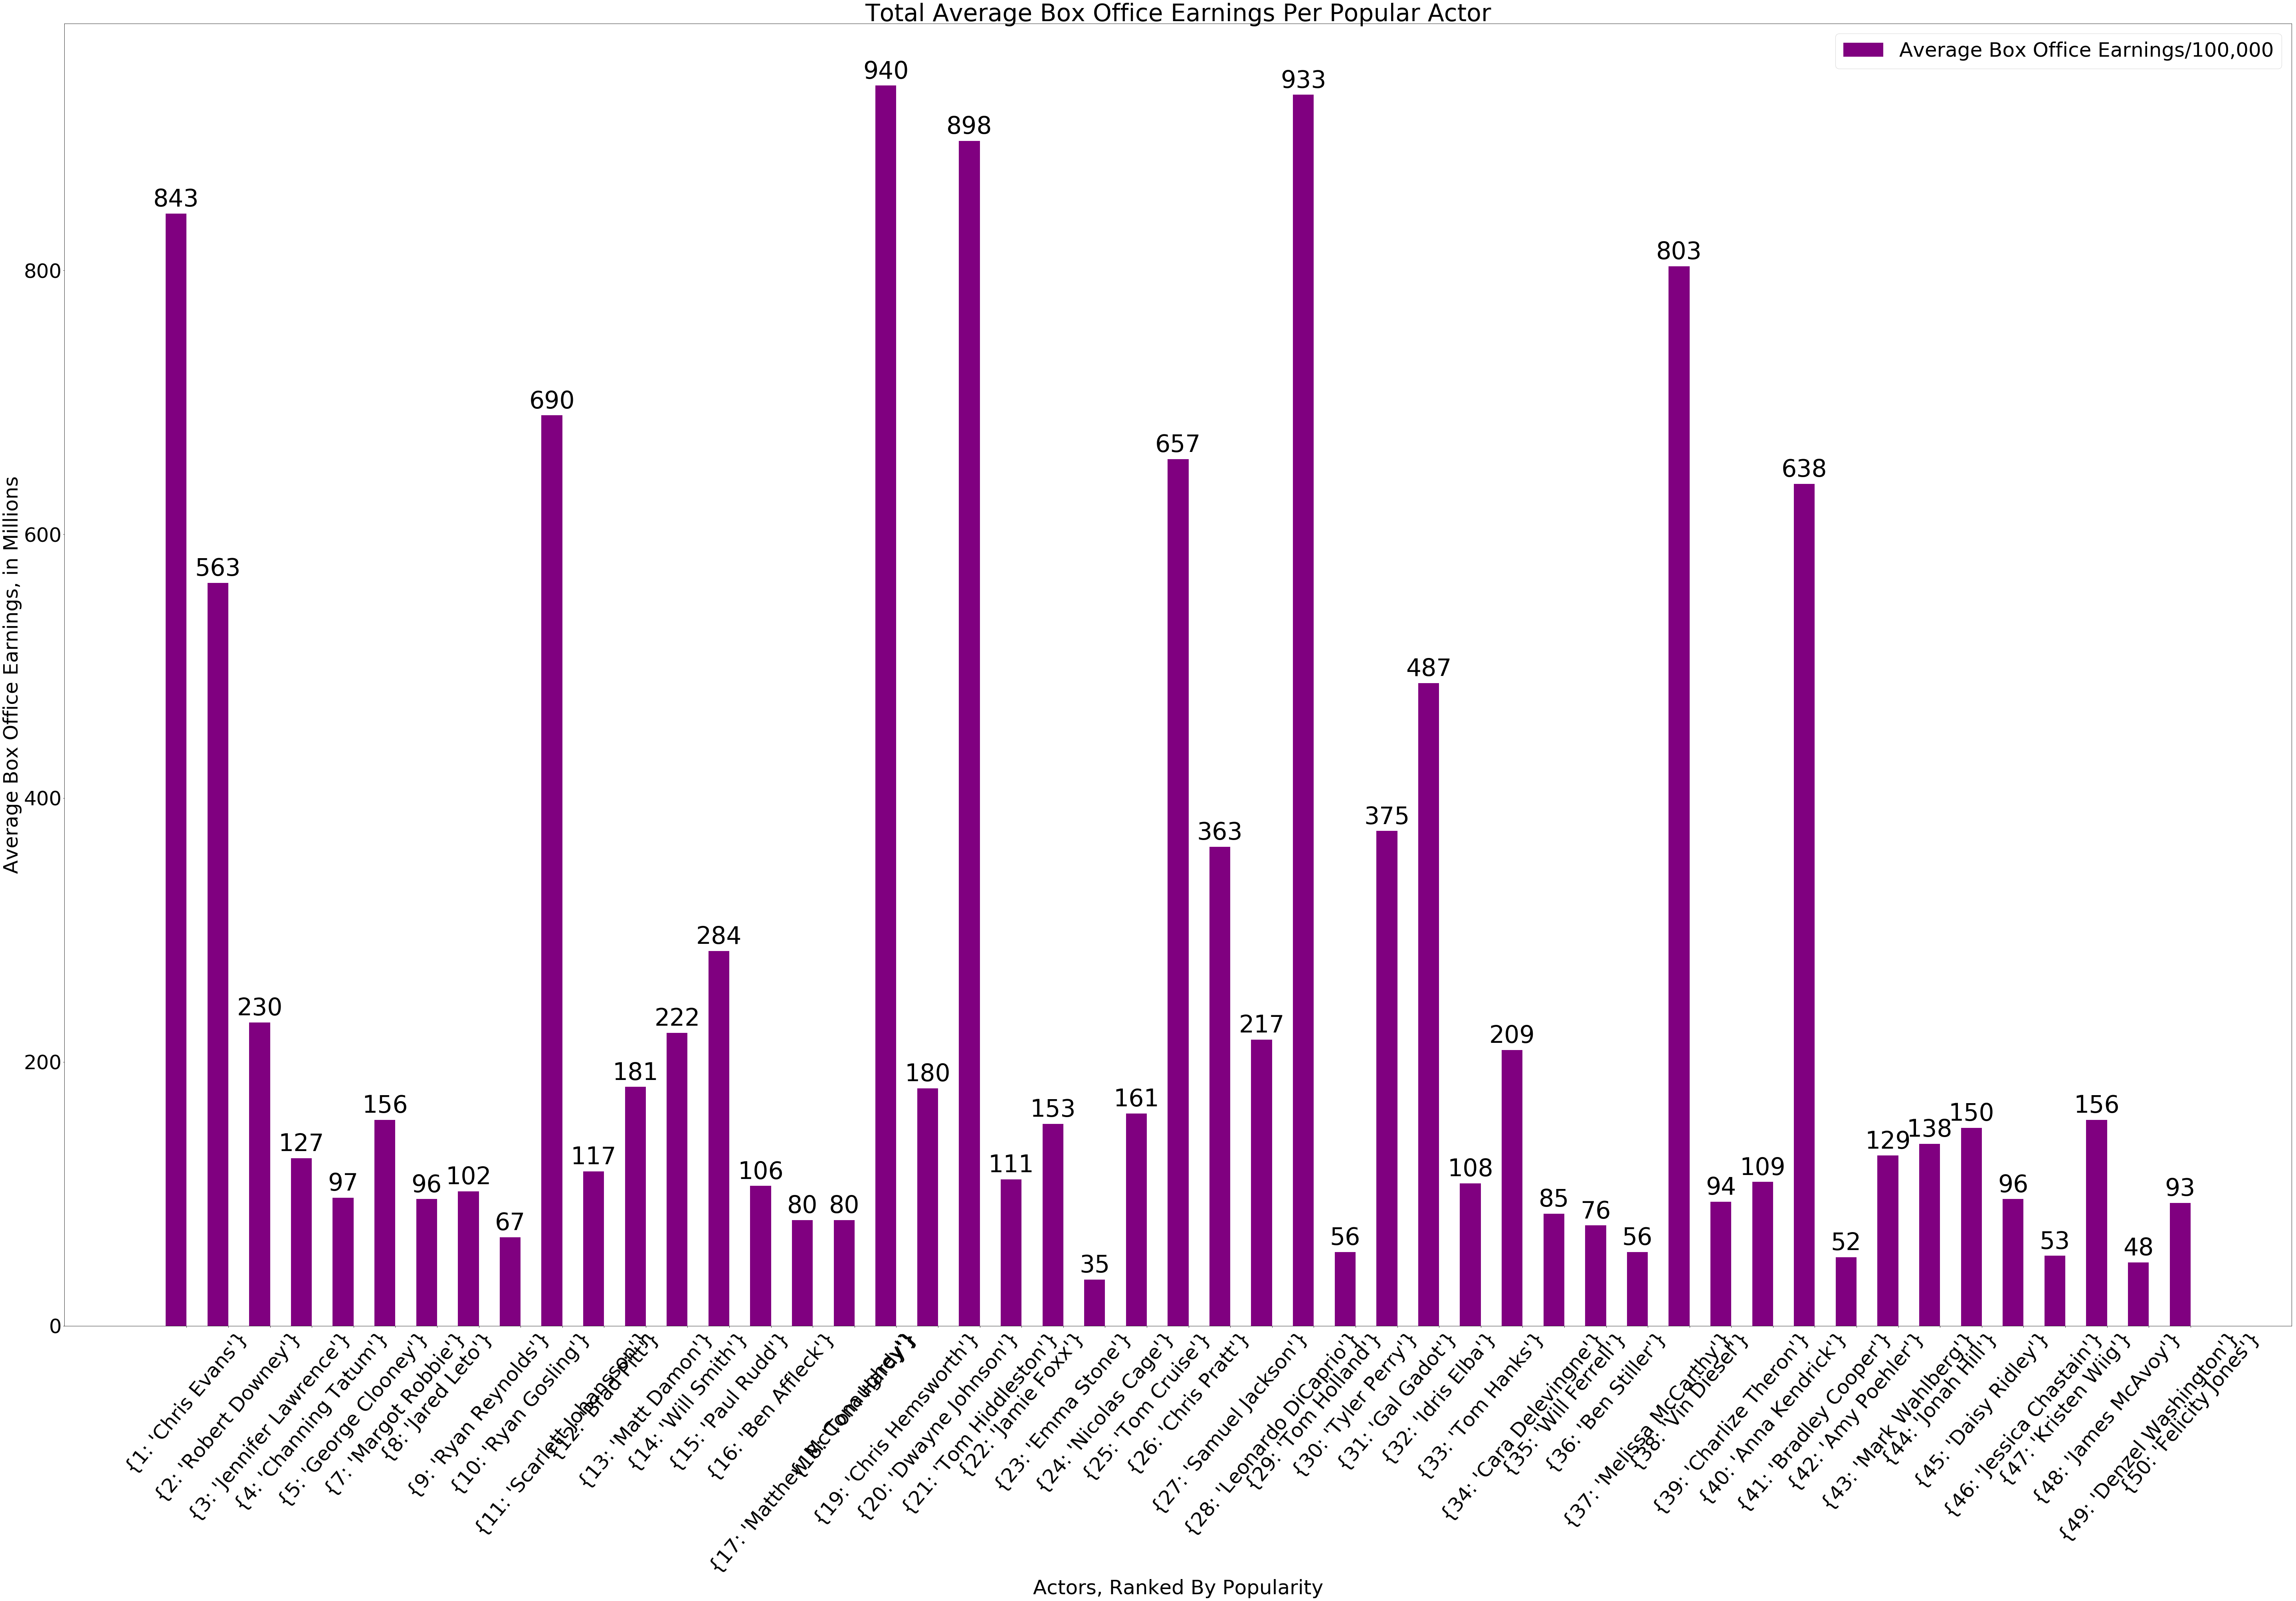

In [500]:
x0=[]
y=[]
for result in results0:
    x0.append(result[3])
    y.append(int(result[4]/1000000))
print(x0,y)
print(label)
# fig, ax = plt.subplots()
# ax.bar(x0,y, color='purple')



x = np.arange(len(results0))  # the label locations
print(x)
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(100,60))
rects1 = ax.bar(x - width/2, y, width, label='Average Box Office Earnings/100,000', color='purple')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Box Office Earnings, in Millions')
ax.set_xlabel('Actors, Ranked By Popularity')
ax.set_title('Total Average Box Office Earnings Per Popular Actor')
ax.set_xticks(x)
ax.set_xticklabels(label, rotation = 50)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 0)

plt.rcParams.update({'font.size': 60})

autolabel(rects1)

# fig.tight_layout()
plt.savefig('BO_v_Pop.png')
plt.show()





In [483]:
c.execute("""select actor_id, first_name, last_name, salary, avg(movies.bo_ww)
from actors
join moviesxactors
using (actor_id)
join movies
using (title_id)
group by actor_id
order by salary""")


In [484]:
results1 = c.fetchall()

In [485]:
salaries=[]
for result in results1:
    if result[3]!=0:
        salaries.append(result)
salaries
labels2=[]
y1=[]
i=1
for salary in salaries[:-1]:
    y1.append(int(salary[4]/100000))
    labels2.append({salary[1]+' '+salary[2]:salary[3]})
    i+=1
print(y1)

[944, 6574, 565, 8433, 1811, 1028, 2308, 1533, 677, 1087, 3636, 9408, 1616, 5635, 8034, 1805]


In [486]:
print(labels2)

[{'Charlize Theron': 14}, {'Chris Pratt': 17}, {'Melissa McCarthy': 18}, {'Chris Evans': 18}, {'Matt Damon': 21}, {'Ryan Reynolds': 22}, {'Jennifer Lawrence': 24}, {'Emma Stone': 26}, {'Ryan Gosling': 29}, {'Tom Hanks': 31}, {'Samuel Jackson': 31}, {'Chris Hemsworth': 32}, {'Tom Cruise': 43}, {'Robert Downey': 48}, {'Vin Diesel': 55}, {'Dwayne Johnson': 65}]


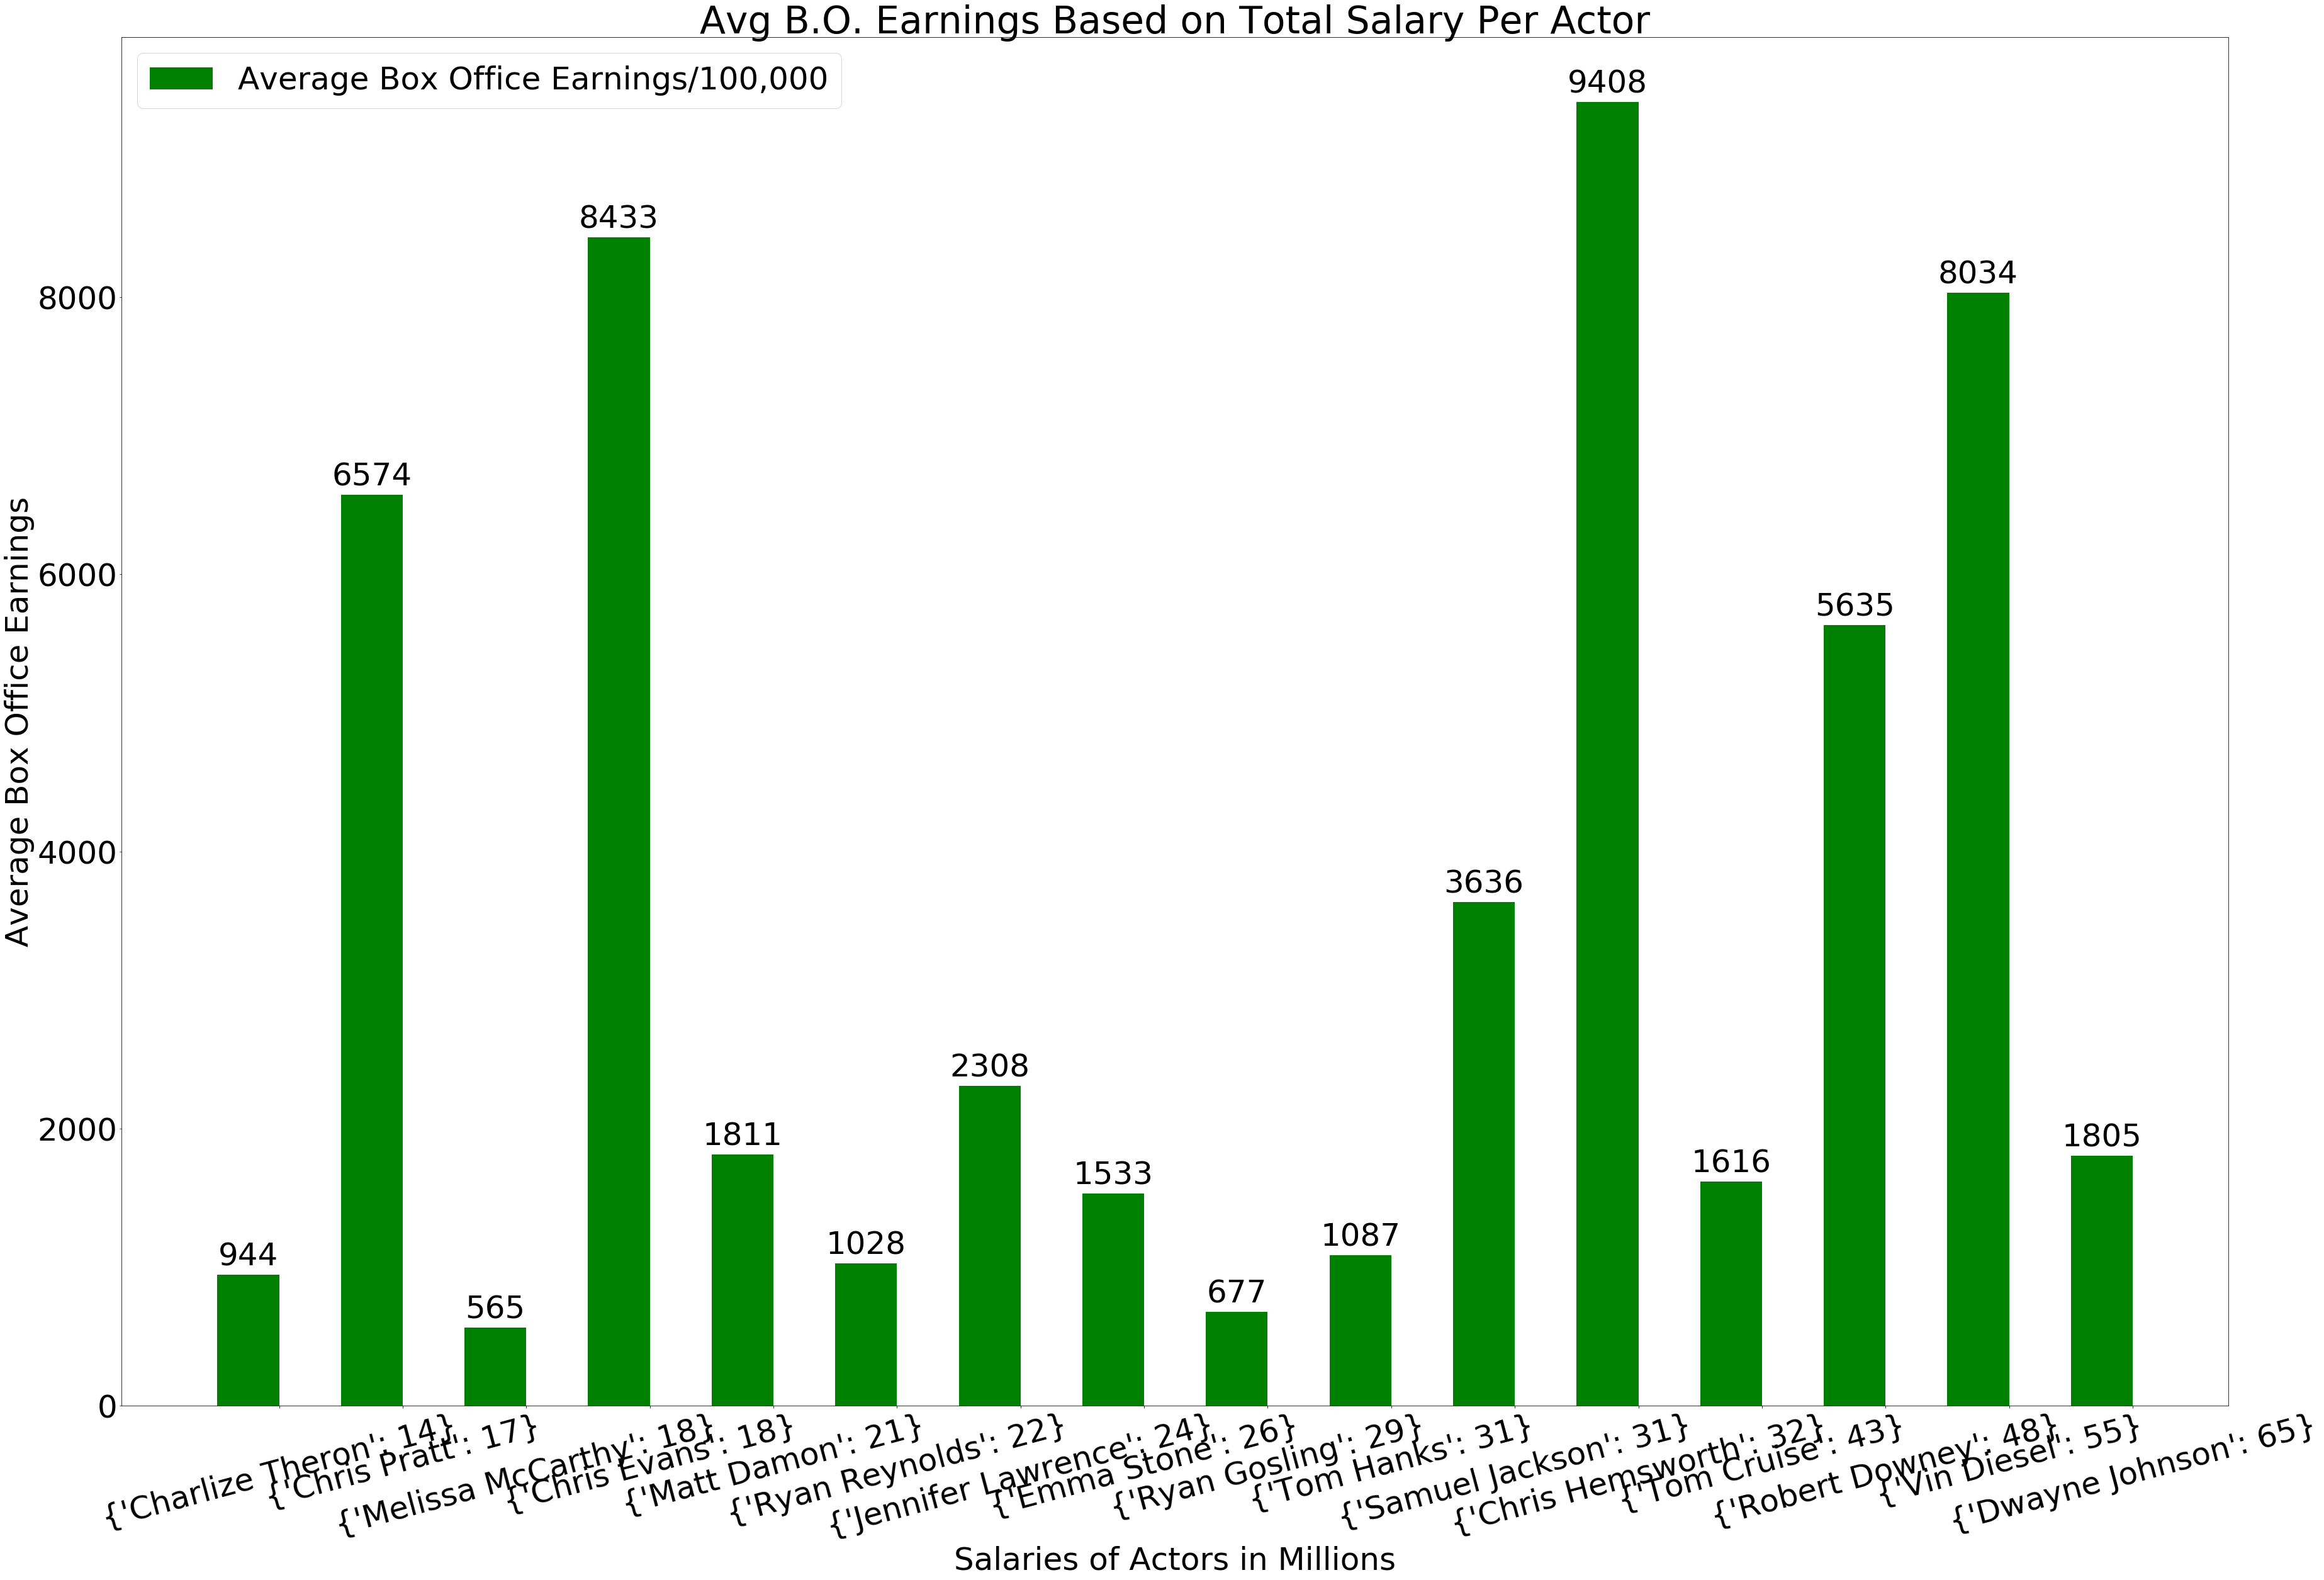

In [487]:
# fig, ax = plt.subplots()
# ax.bar(x1,y1,color='green')

x = np.arange(len(labels2))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(60,40))
rects1 = ax.bar(x - width/2, y1, width, label='Average Box Office Earnings/100,000', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Salaries of Actors in Millions')
ax.set_ylabel('Average Box Office Earnings')
ax.set_title('Avg B.O. Earnings Based on Total Salary Per Actor')
ax.set_xticks(x)
ax.set_xticklabels(labels2, rotation = 15)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 0)

plt.rcParams.update({'font.size': 50})

autolabel(rects1)

# fig.tight_layout()
plt.savefig('BO_v_Sal.png')
plt.show()



In [488]:
c.execute("""select actor_id, first_name, last_name, social_rank, avg(movies.bo_ww)
from actors
join moviesxactors
using (actor_id)
join movies
using (title_id)
where social_rank !=0
group by actor_id
order by social_rank""")






In [489]:
results2=c.fetchall()
results2

social=[]
for result in results:
    if result[3]!=0:
        social.append(result)
social

[('nm1089991', 'Tom', 'Hiddleston', 3405153, Decimal('334465437.1667')),
 ('nm0262635', 'Chris', 'Evans', 8637437, Decimal('349670496.9149')),
 ('nm0004937', 'Jamie', 'Foxx', 9457588, Decimal('76012337.9180')),
 ('nm0000168', 'Samuel', 'Jackson', 9457588, Decimal('173466826.4873')),
 ('nm0001774', 'Ben', 'Stiller', 9502519, Decimal('59243049.3455')),
 ('nm0002071', 'Will', 'Ferrell', 10114538, Decimal('60606919.1759')),
 ('nm0000158', 'Tom', 'Hanks', 15312277, Decimal('71478386.4667')),
 ('nm2225369', 'Jennifer', 'Lawrence', 16641759, Decimal('95524719.6154')),
 ('nm0000129', 'Tom', 'Cruise', 18475521, Decimal('111648706.2000')),
 ('nm1347153', 'Tyler', 'Perry', 18854507, Decimal('42291540.9231')),
 ('nm0000138', 'Leonardo', 'DiCaprio', 36258943, Decimal('89708178.2885')),
 ('nm0425005', 'Dwayne', 'Johnson', 70837131, Decimal('66983039.3143')),
 ('nm0000226', 'Will', 'Smith', 76930952, Decimal('112062900.0000')),
 ('nm0004874', 'Vin', 'Diesel', 100423198, Decimal('303220372.9762'))]

In [494]:

x2=[]
y2=[]
for s in results:
    x2.append(s[3])
    y2.append(int(s[4]/100000))
print(y2)
media=[]

for r in results:
    name=r[1]+' '+r[2]
    media.append(name)


def create_labels(list1):
    actor_names = []
    for i in range(len(list1)):
        actor_names.append({list1[i][1]+' '+list1[i][2]:list1[i][3]})
    return actor_names

actor_names=create_labels(results)

name=[]
for actor in actor_names:
    for k, v in actor.items():
        a=v
        name.append(a)
media

[3344, 3496, 760, 1734, 592, 606, 714, 955, 1116, 422, 897, 669, 1120, 3032]


['Tom Hiddleston',
 'Chris Evans',
 'Jamie Foxx',
 'Samuel Jackson',
 'Ben Stiller',
 'Will Ferrell',
 'Tom Hanks',
 'Jennifer Lawrence',
 'Tom Cruise',
 'Tyler Perry',
 'Leonardo DiCaprio',
 'Dwayne Johnson',
 'Will Smith',
 'Vin Diesel']

In [495]:
print(y2)

[3344, 3496, 760, 1734, 592, 606, 714, 955, 1116, 422, 897, 669, 1120, 3032]


In [496]:
 actor_names=create_labels(results)
actor_names

[{'Tom Hiddleston': 3405153},
 {'Chris Evans': 8637437},
 {'Jamie Foxx': 9457588},
 {'Samuel Jackson': 9457588},
 {'Ben Stiller': 9502519},
 {'Will Ferrell': 10114538},
 {'Tom Hanks': 15312277},
 {'Jennifer Lawrence': 16641759},
 {'Tom Cruise': 18475521},
 {'Tyler Perry': 18854507},
 {'Leonardo DiCaprio': 36258943},
 {'Dwayne Johnson': 70837131},
 {'Will Smith': 76930952},
 {'Vin Diesel': 100423198}]

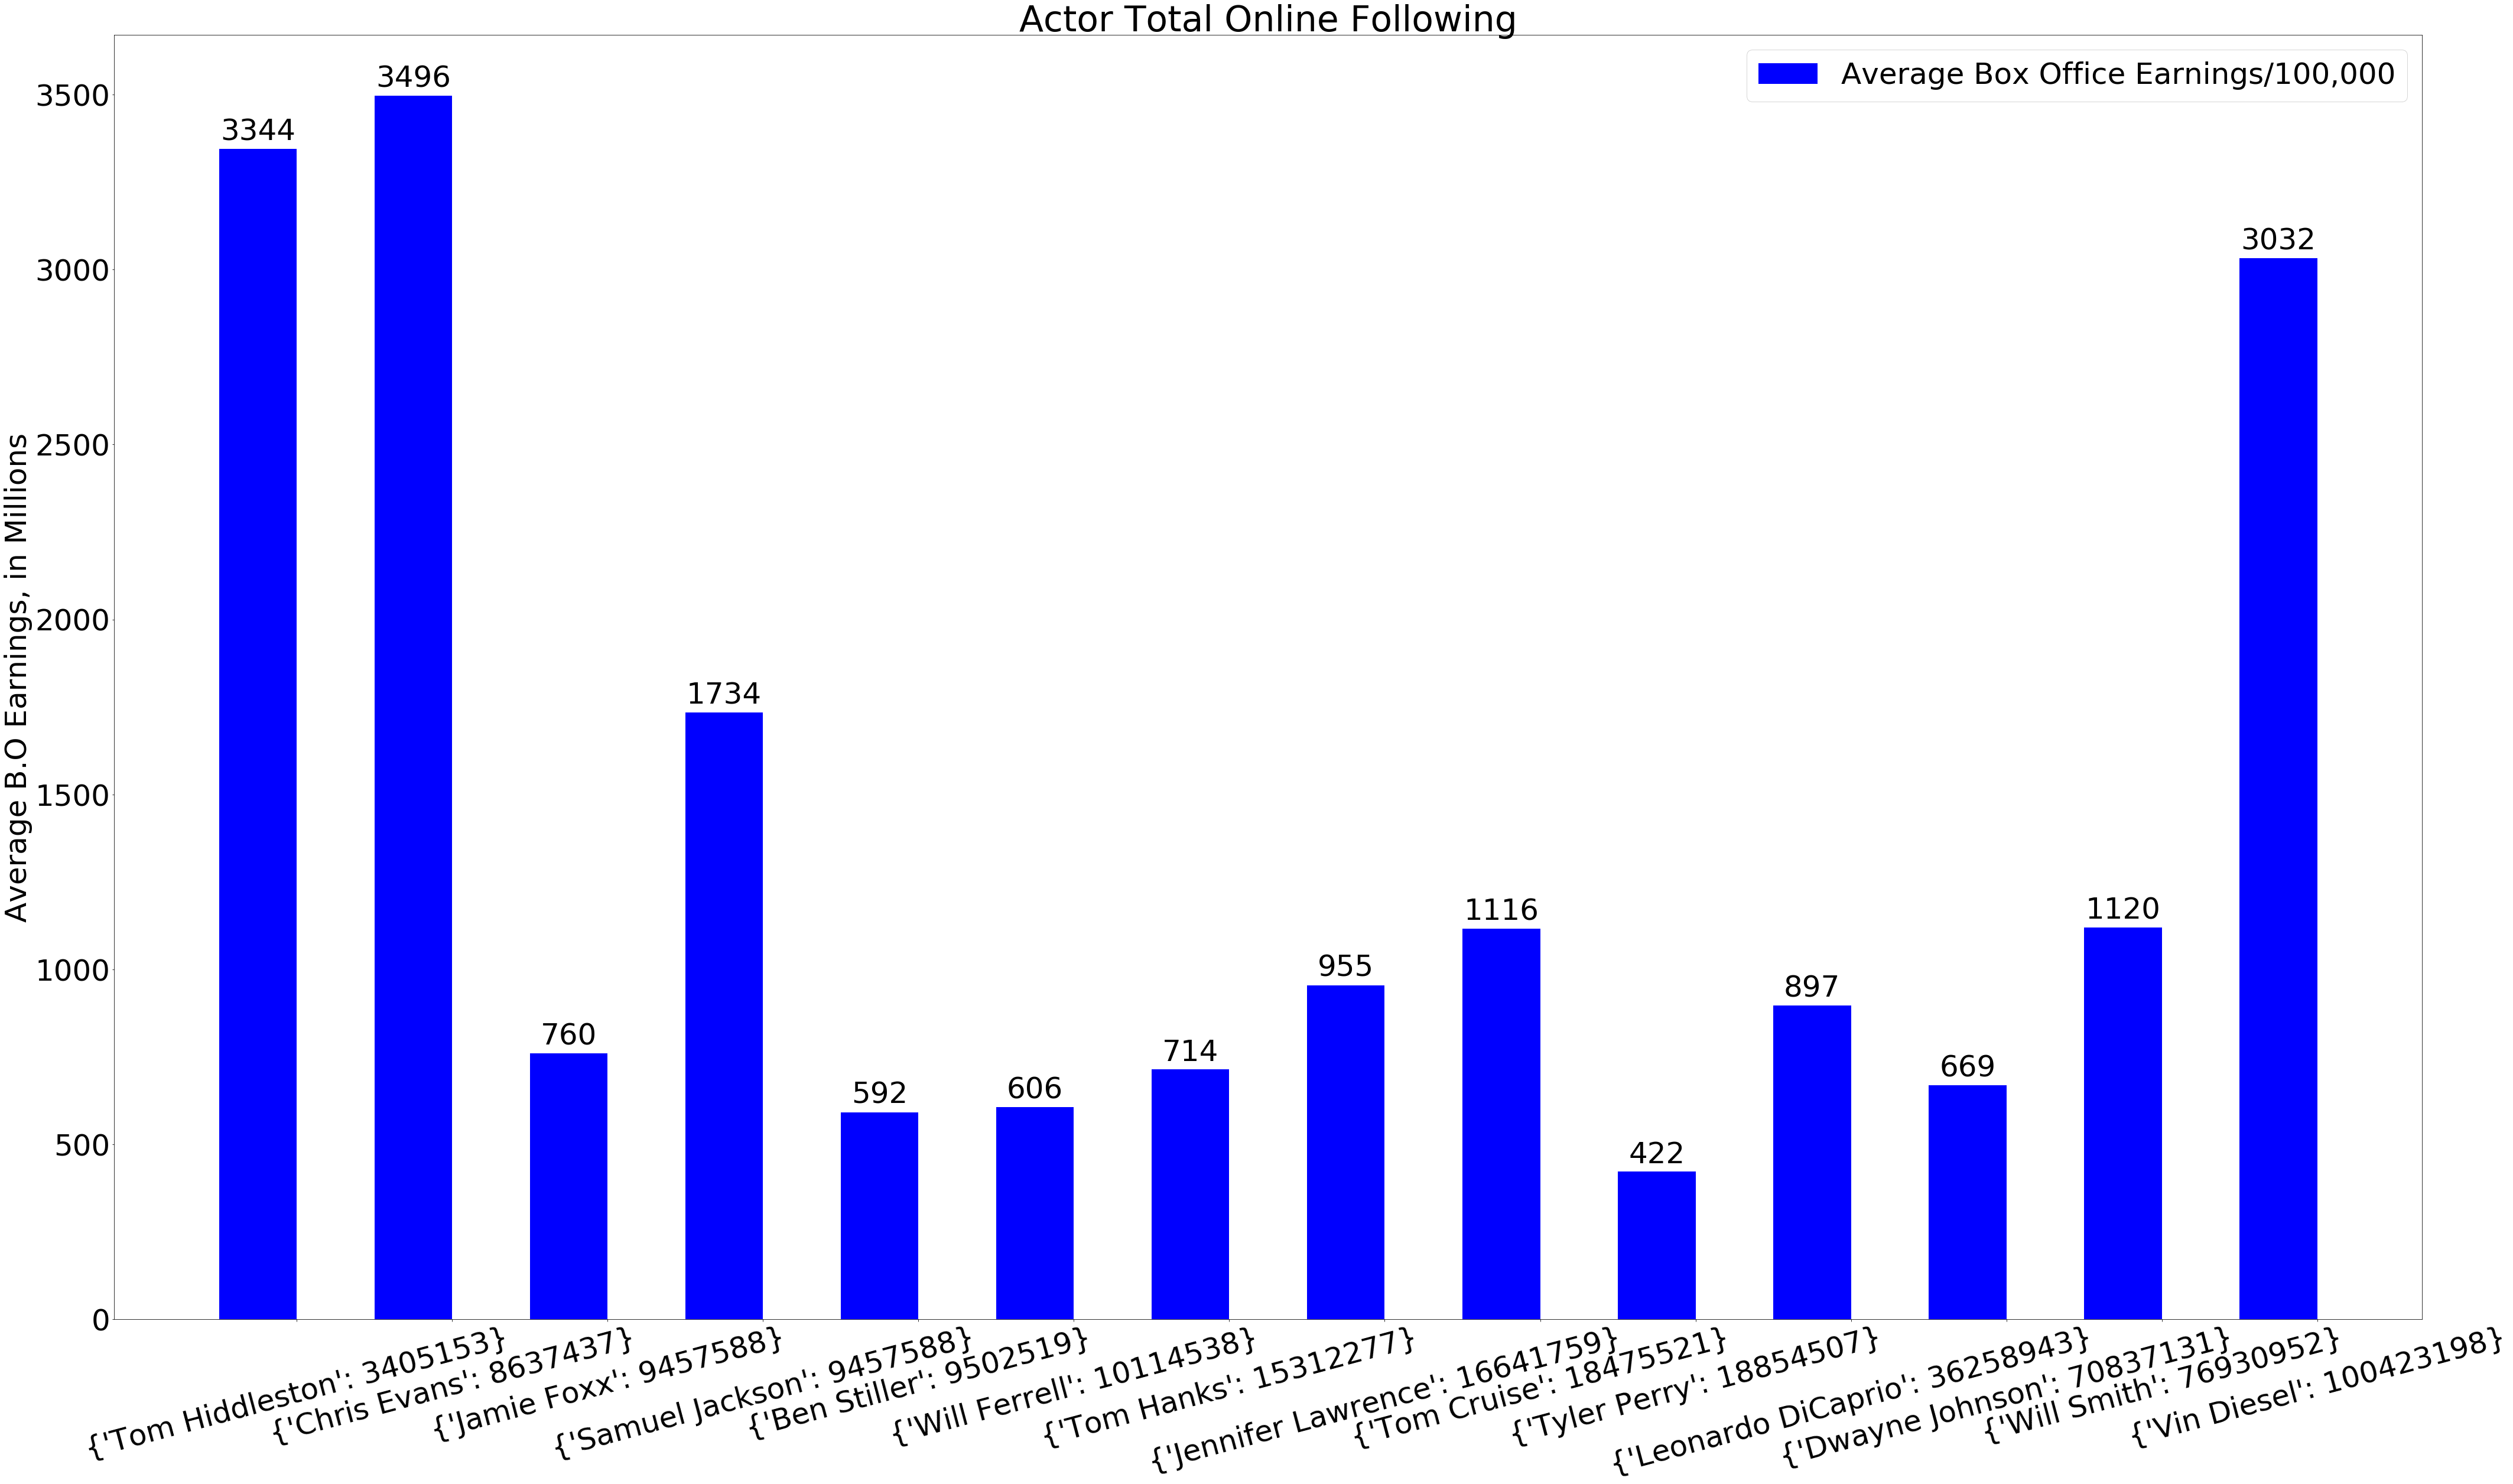

In [497]:
x = np.arange(len(actor_names))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(70,40))
rects1 = ax.bar(x - width/2, y2, width, label='Average Box Office Earnings/100,000', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average B.O Earnings, in Millions')
ax.set_title('Actor Total Online Following')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 15)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 0)

plt.rcParams.update({'font.size': 50})

autolabel(rects1)

# fig.tight_layout()

plt.savefig('BO_v_Social.png')
plt.show()



